In [5]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns # I love this package!
sns.set_style('white')

import torch

plt.style.use('fivethirtyeight')

csv_list = ("./result_stylegancond.csv", "./result_stylegan_crwdcnt.csv", "./result_styleganvgkg.csv","./result_dpsgd1.csv","./result_dpsgd10.csv", "./result_real.csv")

legends = ("P3D (StyleGAN3)","P3D FT (Crowd)","P3D FT (VGKG)","DP-SGD (ε=1)","DP-SGD (ε=10)","Real")

# load prediction

df_preds = []
for csv in csv_list:
        df_preds.append(pd.read_csv(csv)["protest"])

#df_pred = pd.read_csv(output_csv_path)
#df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

# load target
test_label_path = '/scratch/UCLA-protest-test/annot_test.txt'
df_target = pd.read_csv(test_label_path, delimiter= '\t')

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, preds):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots(dpi=400)
    #auc = roc_auc_score(target, pred)
    #acc = accuracy_score(target, (pred >= 0.5).astype(int))
    for i,pred in enumerate(preds):
        fpr, tpr, _ = roc_curve(target, pred)
        plt.plot(fpr, tpr, label= legends[i])
    #plt.legend(loc = 4, fontsize = 15)
    #plt.title(('ROC Curves for {attr}'
    #           .format(attr = attr.title())),
    #         fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend()
    plt.show()
    return fig

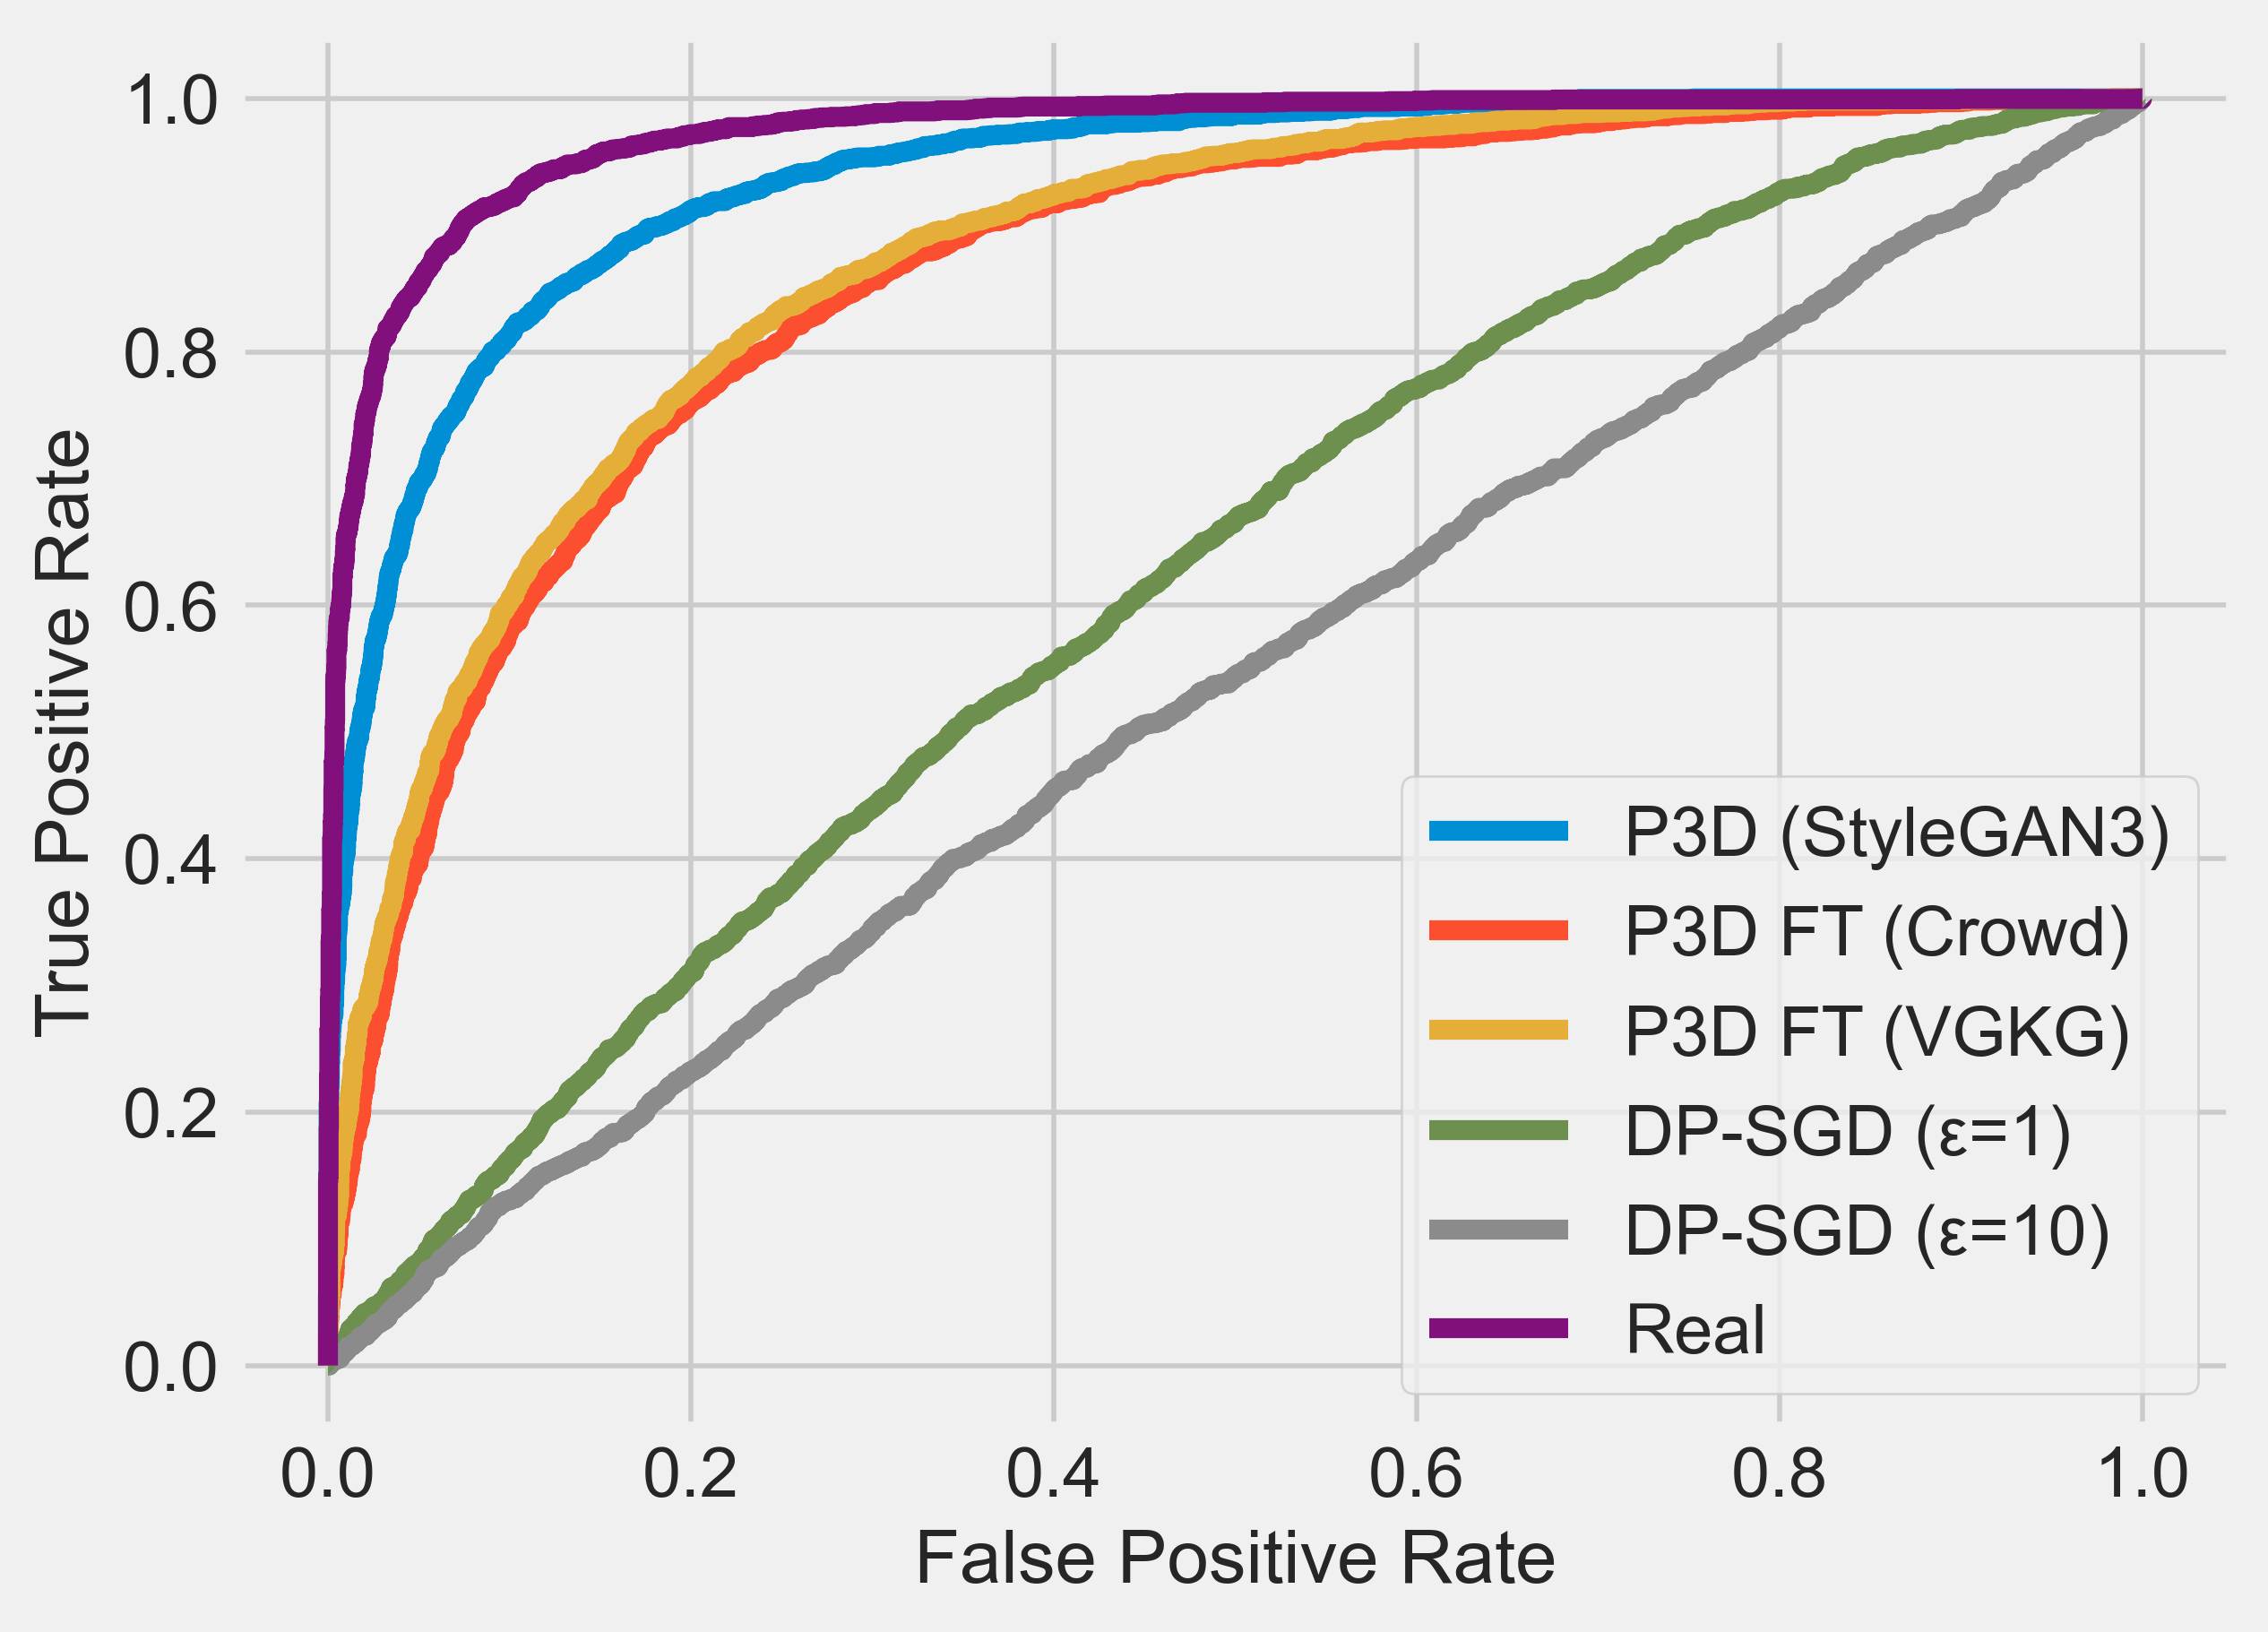

In [7]:
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_preds
fig = plot_roc(attr, target, pred)
fig.savefig(os.path.join('files', attr+'.pdf'),bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

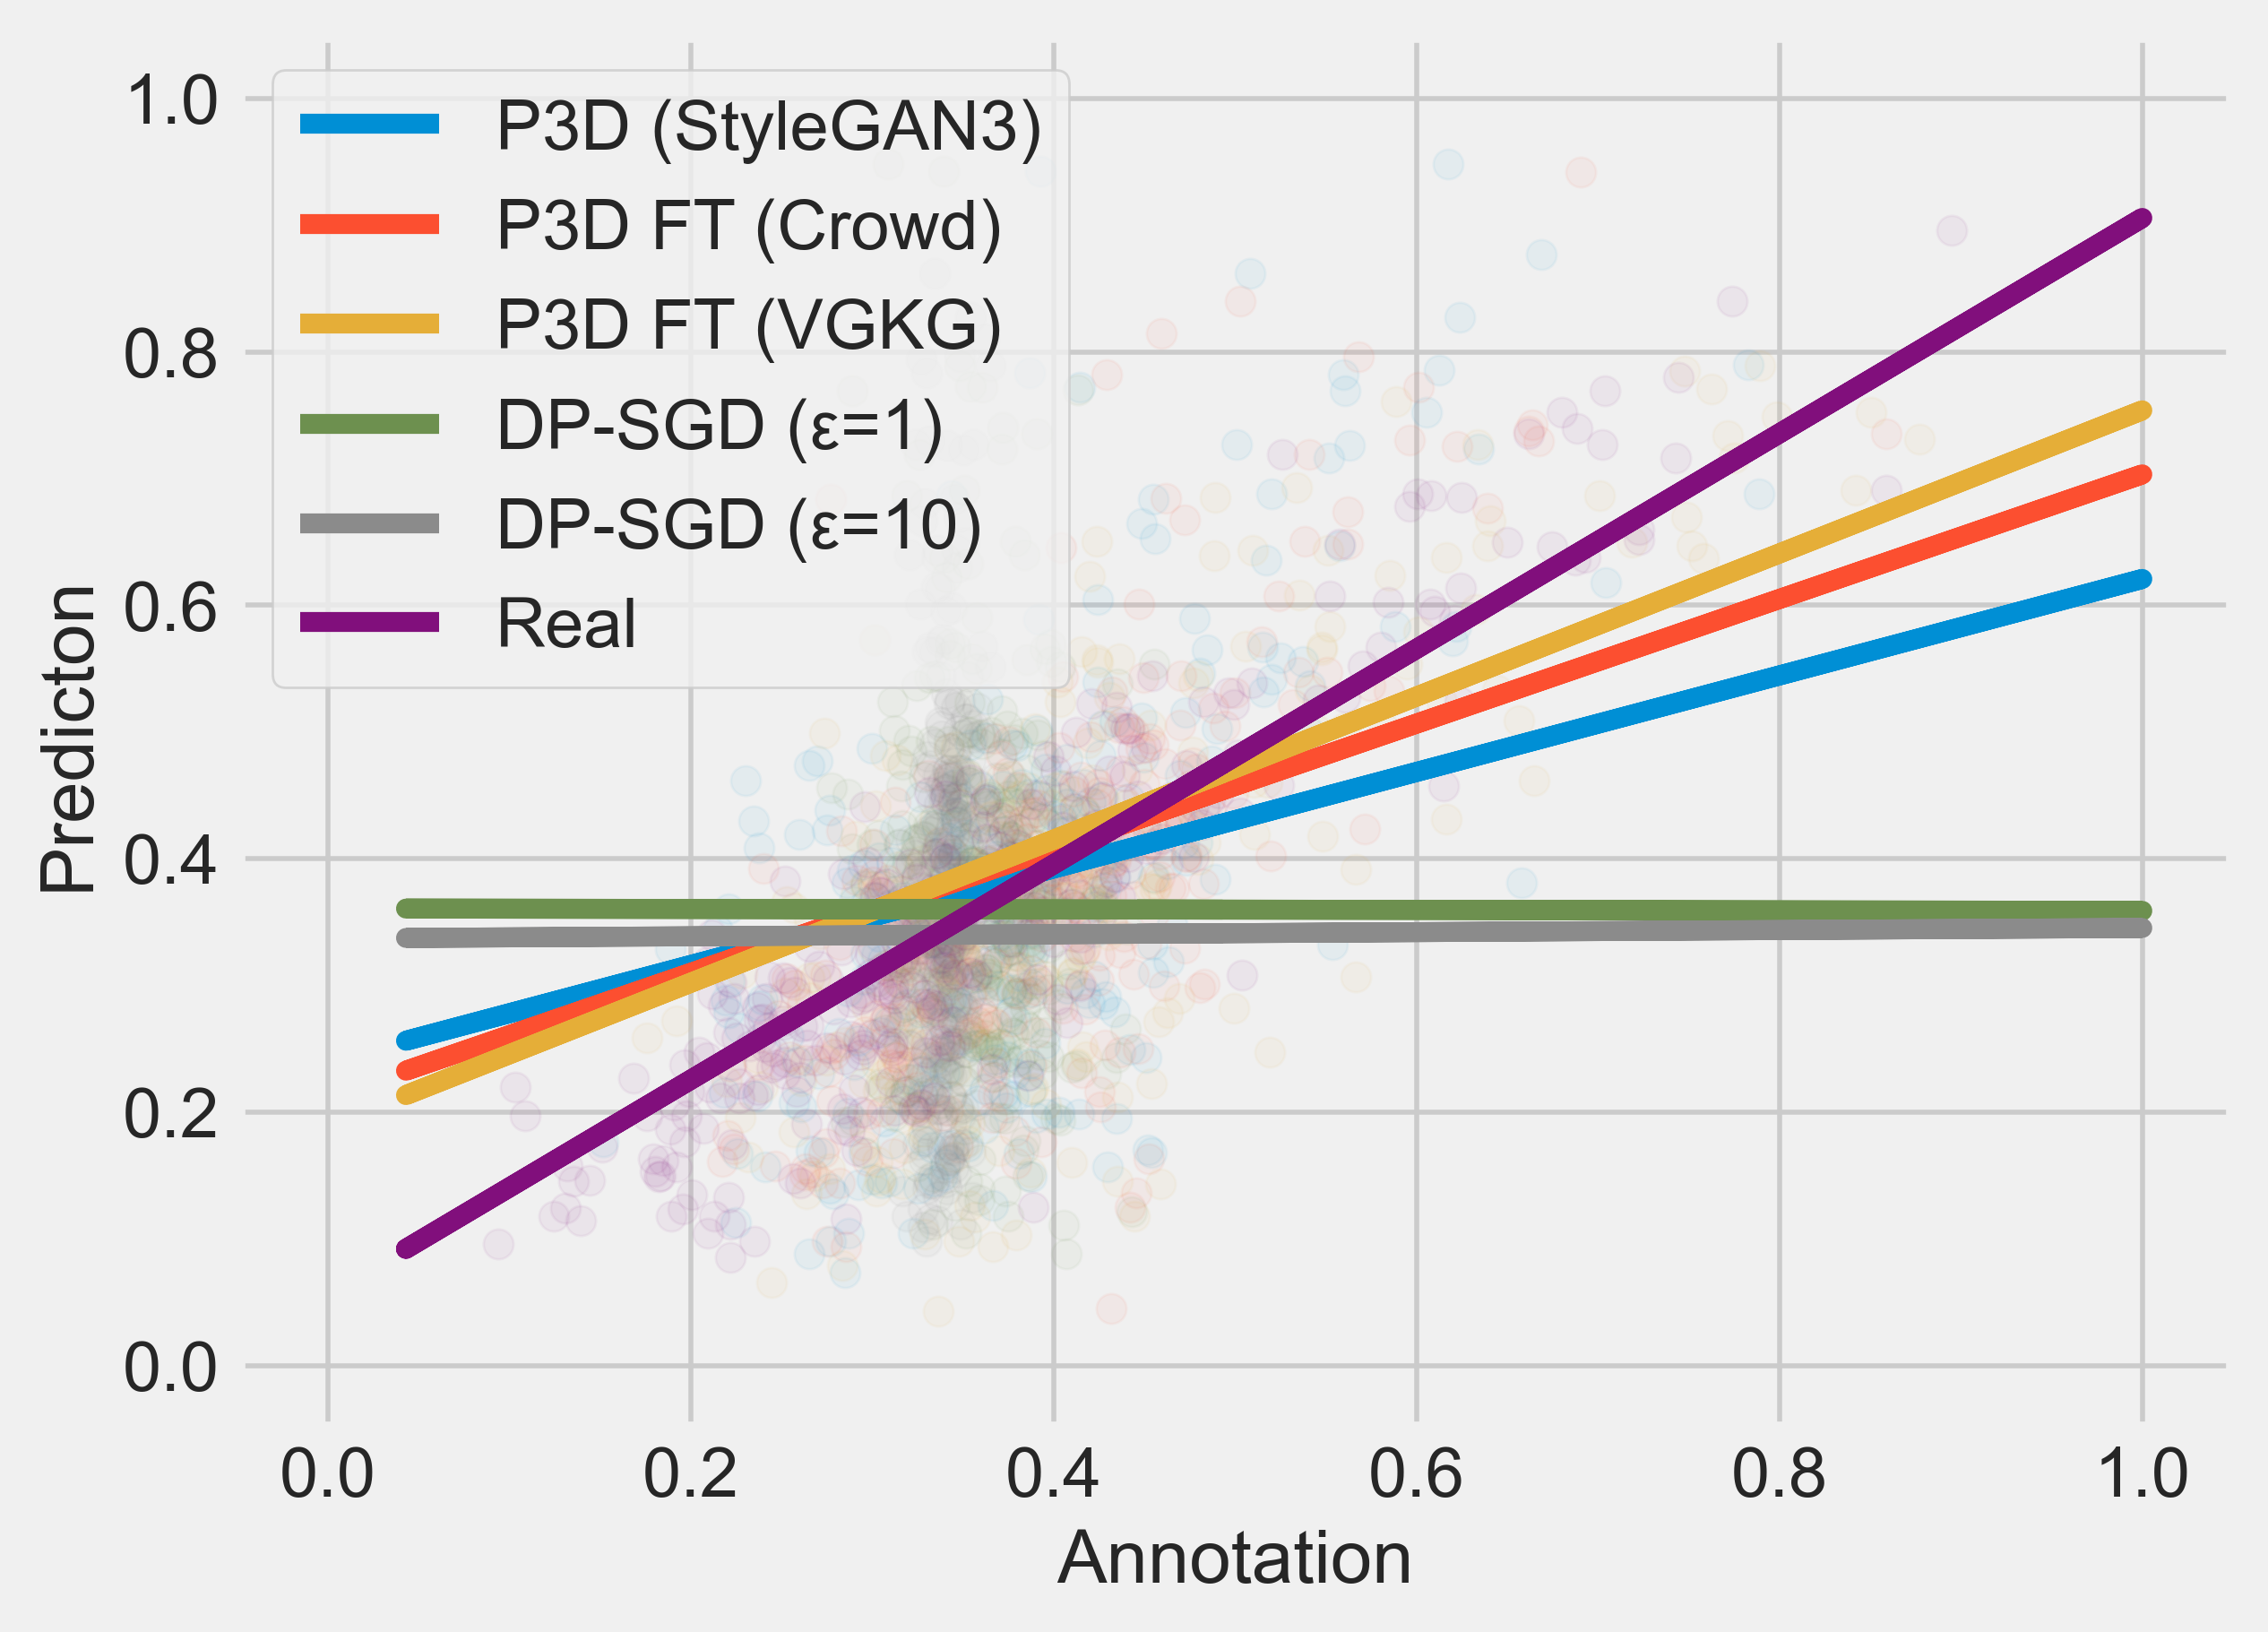

In [8]:
import scipy.stats as stats
import numpy as np
import random

df_preds = []
for csv in csv_list:
        df_preds.append(pd.read_csv(csv))

def plot_vio(preds):
        fig, ax = plt.subplots(dpi=400)
        for i,df_pred in enumerate(df_preds):
                attr = 'violence'
                pred = df_pred[df_target['protest'] == 1][attr].tolist()
                target = df_target[df_target['protest'] == 1][attr].astype(float).tolist()
                x_sub, y_sub = zip(*random.sample(list(zip(pred, target)), 300))
                plt.scatter(x_sub, y_sub, alpha=0.05)
                plt.xlim([-.05,1.05])
                plt.ylim([-.05,1.05])
                plt.xlabel('Annotation', fontsize = 15)
                plt.ylabel('Predicton', fontsize = 15)

                slope, intercept, r_value, p_value, std_err = stats.linregress(target, pred)
                line = slope * np.array(target) + intercept
                plt.plot(target, line, label=legends[i])

                corr, pval = stats.pearsonr(target, pred)
        #plt.title(('Scatter Plot for {attr}')
        #        .format(attr = attr.title()), fontsize = 15)
        plt.legend()
        plt.show()
        fig.savefig(os.path.join('files', attr+'.pdf'),bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

plot_vio(df_preds)

